## K means clusters on Banking Data set

Imports

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import os
import warnings
warnings.filterwarnings('ignore')

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
%cd /content/drive/MyDrive/Colab Notebooks/Data Analytics Assesment

/content/drive/MyDrive/Colab Notebooks/Data Analytics Assesment


In [7]:
df = pd.read_csv("bank.csv")

In [8]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [9]:
from sklearn.preprocessing import OneHotEncoder

In [10]:
ohe = OneHotEncoder(handle_unknown='ignore', sparse_output= False).set_output(transform='pandas')

In [11]:
ohetransform = ohe.fit_transform(df[['marital']])

In [13]:
# Check this has worked
ohetransform.head()

,marital_divorced,marital_married,marital_single
0,0.0,1.0,0.0
1,0.0,1.0,0.0
2,0.0,1.0,0.0
3,0.0,1.0,0.0
4,0.0,1.0,0.0


In [14]:
df = pd.concat([df, ohetransform], axis=1)

In [15]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit,marital_divorced,marital_married,marital_single
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes,0.0,1.0,0.0
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes,0.0,1.0,0.0
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes,0.0,1.0,0.0
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes,0.0,1.0,0.0
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes,0.0,1.0,0.0


In [18]:
# Sklearn - Finding amount of clusters
import sklearn
from sklearn.cluster import KMeans

df1 = df[['age','balance','marital_divorced','marital_married','marital_single']].copy()



In [19]:
df1.head()

,age,balance,marital_divorced,marital_married,marital_single
0,59,2343,0.0,1.0,0.0
1,56,45,0.0,1.0,0.0
2,41,1270,0.0,1.0,0.0
3,55,2476,0.0,1.0,0.0
4,54,184,0.0,1.0,0.0


In [20]:
#Step 1: initialise the clustering algorithm
kmeans = KMeans(n_clusters=5, random_state=1234)


In [21]:
# Step 2: fit and predict
pred_kmeans = kmeans.fit_predict(df1)


In [22]:
# Step 3: intergrate the cluster assignment to the orginal data
newdf = df1.assign(Cluster=pred_kmeans)

newdf.head(10)

,age,balance,marital_divorced,marital_married,marital_single,Cluster
0,59,2343,0.0,1.0,0.0,2
1,56,45,0.0,1.0,0.0,0
2,41,1270,0.0,1.0,0.0,0
3,55,2476,0.0,1.0,0.0,2
4,54,184,0.0,1.0,0.0,0
5,42,0,0.0,0.0,1.0,0
6,56,830,0.0,1.0,0.0,0
7,60,545,1.0,0.0,0.0,0
8,37,1,0.0,1.0,0.0,0
9,28,5090,0.0,0.0,1.0,2


In [23]:
print(set(pred_kmeans))

{0, 1, 2, 3, 4}


In [24]:
#kmeans cluster centres

kmeans.cluster_centers_

array([[4.03761723e+01, 4.65361005e+02, 1.17170314e-01, 5.58758828e-01,
        3.24070858e-01],
       [4.60000000e+01, 2.33255634e+04, 5.63380282e-02, 6.61971831e-01,
        2.81690141e-01],
       [4.41150000e+01, 3.39316250e+03, 1.15000000e-01, 6.06500000e-01,
        2.78500000e-01],
       [4.37802691e+01, 9.21980045e+03, 1.00896861e-01, 5.85201794e-01,
        3.13901345e-01],
       [6.00000000e+01, 6.09691250e+04, 2.50000000e-01, 5.00000000e-01,
        2.50000000e-01]])

In [25]:
# fix the scaling

import sklearn.preprocessing as pp

scaler = pp.MinMaxScaler()

X = scaler.fit_transform(df1)

In [26]:
np.max(X, axis=0)

array([1., 1., 1., 1., 1.])

In [27]:
# redo the pred_kmeans
kmeans = KMeans(n_clusters=5)
pred_kmeans = kmeans.fit_predict(X)

In [28]:
# Inverse transform
centers_rw = scaler.inverse_transform(kmeans.cluster_centers_)

Text(0.5, 1.0, 'KMeans with n_clusters = 5')

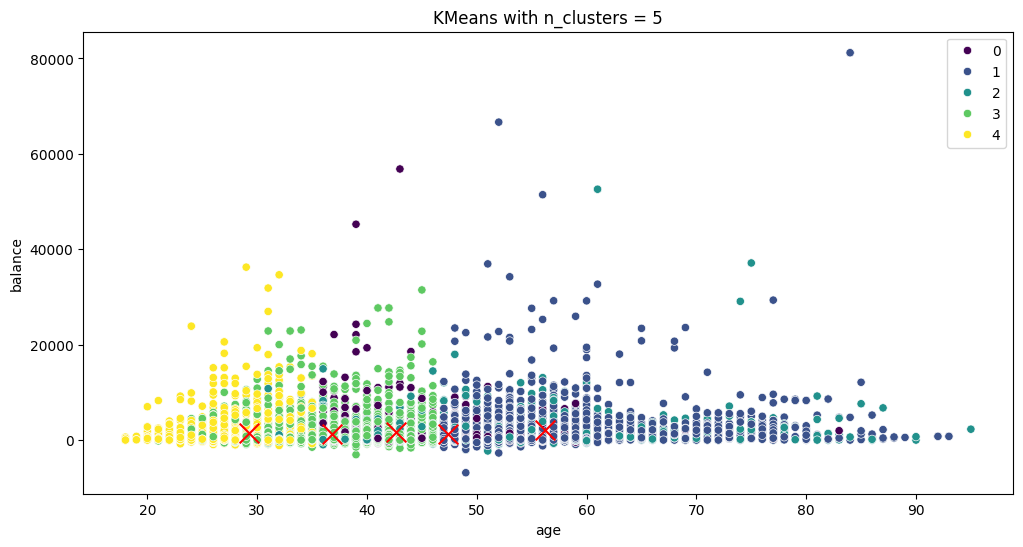

In [29]:
#Set the size of the figure
plt.figure(figsize=(12,6))

#Plotting the clusters
sns.scatterplot(x='age', y='balance', data=df1, hue=pred_kmeans, palette='viridis', legend='auto')

#Plotting the cluster centers
plt.scatter(centers_rw[:,0],centers_rw[:,1], color="red",s=200, marker='x')

plt.title('KMeans with n_clusters = 5')

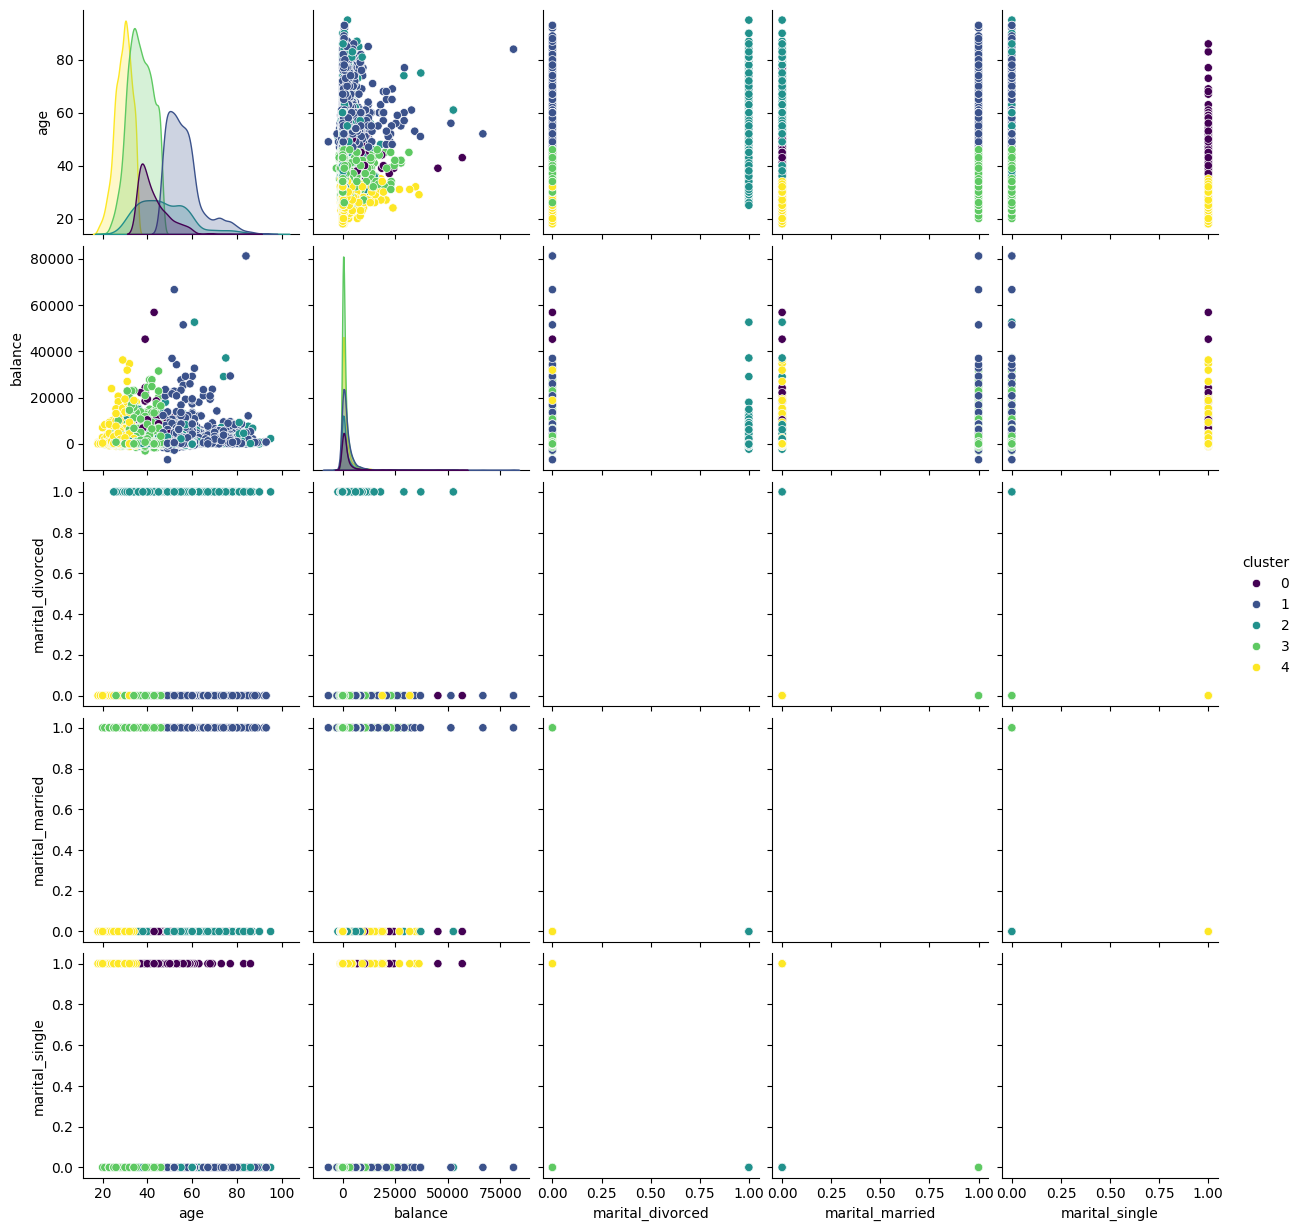

In [31]:
df1['cluster'] = pred_kmeans  # Add cluster labels to DataFrame
sns.pairplot(df1, hue='cluster', palette='viridis')
plt.show()

In [30]:
newdf.groupby('Cluster').describe()

age                                                       balance  \
          count       mean        std   min    25%   50%    75%   max   count   
Cluster                                                                         
0        8632.0  40.371640  11.397068  18.0  32.00  38.0  48.00  93.0  8632.0   
1          71.0  46.000000  13.493914  24.0  34.00  45.0  55.50  77.0    71.0   
2        2004.0  44.117265  13.092159  20.0  34.00  42.0  53.00  95.0  2004.0   
3         447.0  43.816555  12.918419  20.0  33.50  42.0  53.00  87.0   447.0   
4           8.0  60.000000  16.750267  39.0  49.75  58.5  66.75  84.0     8.0   

                       ... marital_married      marital_single            \
                 mean  ...             75%  max          count      mean   
Cluster                ...                                                 
0          464.510658  ...             1.0  1.0         8632.0  0.324027   
1        23325.563380  ...             1.0  1.0           71.0  0.281690   
2         3388.066367  ...             1.0  1.0         2004.0  0.278942   
3         9213.284116  ...             1.0  1.0          447.0  0.313199   
4        60969.125000  ...             1.0  1.0            8.0  0.250000   

                                             
              std  min  25%  50%   75%  max  
Cluster                                      
0        0.468037  0.0  0.0  0.0  1.00  1.0  
1        0.453025  0.0  0.0  0.0  1.00  1.0  
2        0.448591  0.0  0.0  0.0  1.00  1.0  
3        0.464314  0.0  0.0  0.0  1.00  1.0  
4        0.462910  0.0  0.0  0.0  0.25  1.0  

[5 rows x 40 columns]

# Making a more educated decision

Elbow Method

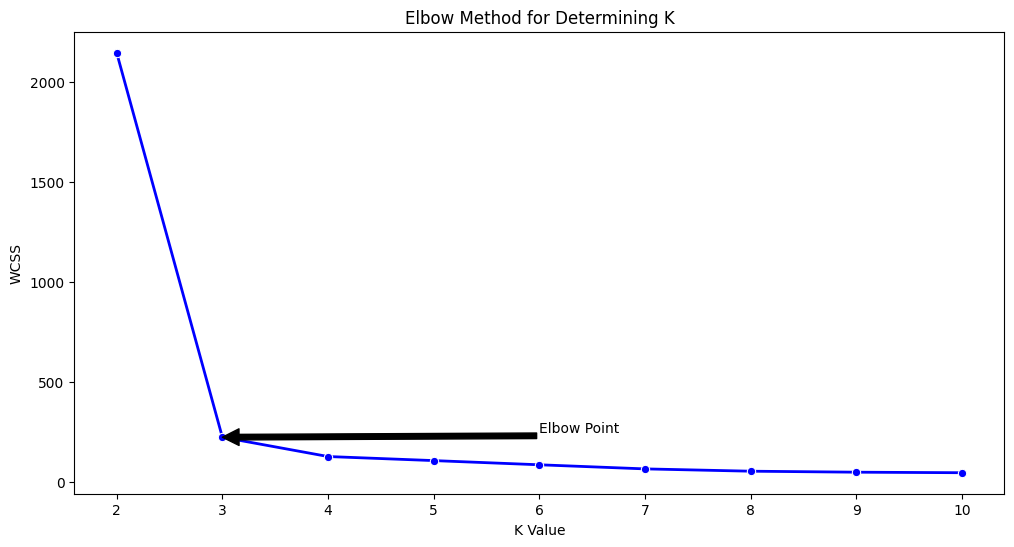

In [38]:
# Elbow Method

inertia_scores = []

for k in range(2,11):
  kmeans = KMeans(n_clusters=k)
  kmeans.fit(X)
  inertia_scores.append(kmeans.inertia_)

  # Creating a DataFrame for Seaborn plotting
df_inertia= pd.DataFrame({'K Value':range(2,11),'WCSS': inertia_scores})

# Creating the figure and axis object
fig, ax = plt.subplots(figsize=(12,6))

# Plotting with Seaborn, assigning the Axes object to ax
sns.lineplot(data = df_inertia, x='K Value', y ='WCSS', linewidth = 2, color='blue',marker="o",ax= ax)

# Annotating the "elbow" point
x_val = 3
y_val = df_inertia.loc[df_inertia['K Value'] == x_val, 'WCSS'].values[0]
ax.annotate("Elbow Point", xy=(x_val,y_val), xytext=(6, y_val + 0.1*y_val), arrowprops=dict(facecolor='black'))

# Using ax.set() to set titles, labels, and ticks
ax.set(
    title="Elbow Method for Determining K",
    xlabel="K Value",
    ylabel="WCSS",
    xticks=np.arange(2, 11, 1));

In [39]:
# kneed to find optimal K value
!pip install kneed

In [40]:
from kneed import KneeLocator
kl = KneeLocator(range(2,11), inertia_scores, curve='convex', direction='decreasing')

kl.elbow

3

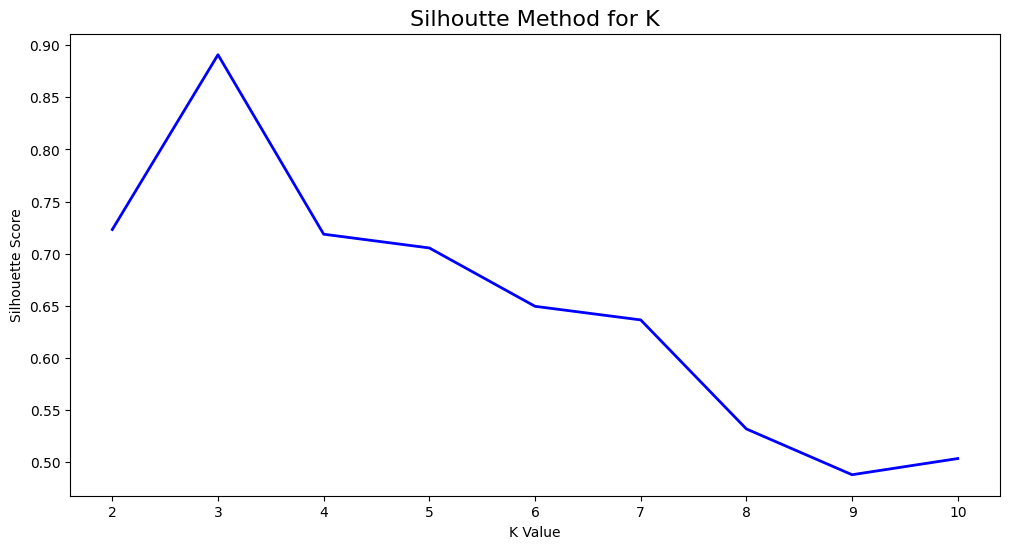

In [41]:
# metric for evaluation
from sklearn.metrics import silhouette_score

silhouette_scores = []

for k in range(2,11):
  kmeans = KMeans(n_clusters=k)
  kmeans.fit(X)
  silhouette_scores.append(silhouette_score(X, kmeans.predict(X)))

plt.figure(figsize=(12, 6))
plt.plot(range(2,11), silhouette_scores, linewidth=2, color='blue')
plt.xlabel("K Value")
plt.xticks(np.arange(2,11,1))
plt.ylabel("Silhouette Score")
plt.title("Silhoutte Method for K", fontsize=16)
plt.show()

Lets see what three clusters would look like

In [48]:
# redo the pred_kmeans
kmeans = KMeans(n_clusters=3)
pred_kmeans = kmeans.fit_predict(X)

In [49]:
# Inverse transform
centers_rw = scaler.inverse_transform(kmeans.cluster_centers_)

Text(0.5, 1.0, 'KMeans with n_clusters = 3')

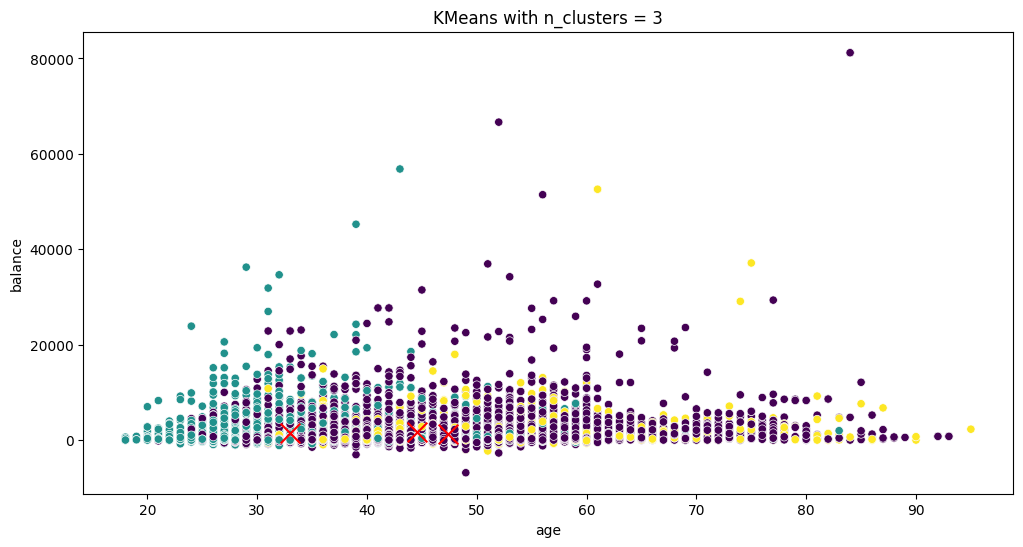

In [50]:
#Set the size of the figure
plt.figure(figsize=(12,6))

#Plotting the clusters
sns.scatterplot(x='age', y='balance', data=df1, hue=pred_kmeans, palette='viridis', legend=None)

#Plotting the cluster centers
plt.scatter(centers_rw[:,0],centers_rw[:,1], color="red",s=200, marker='x')

plt.title('KMeans with n_clusters = 3')

Transforming in 3D

In [51]:
# scale input and run k-means
X = scaler.fit_transform(df1)

kmeans = KMeans(n_clusters=3)
pred_kmeans = kmeans.fit_predict(X)

df1['cluster'] = pred_kmeans

df1.groupby('cluster').describe()

age                                                     balance  \
          count       mean        std   min   25%   50%   75%   max   count   
cluster                                                                       
0        6351.0  44.533617  11.523646  20.0  35.0  43.0  52.0  93.0  6351.0   
1        3518.0  33.017339   7.685012  18.0  28.0  31.0  36.0  86.0  3518.0   
2        1293.0  47.365043  11.732430  25.0  38.0  46.0  55.0  95.0  1293.0   

                      ... marital_married      marital_single                 \
                mean  ...             75%  max          count mean  std  min   
cluster               ...                                                      
0        1599.927570  ...             1.0  1.0         6351.0  0.0  0.0  0.0   
1        1457.255259  ...             0.0  0.0         3518.0  1.0  0.0  1.0   
2        1371.835267  ...             0.0  0.0         1293.0  0.0  0.0  0.0   

                             
         25%  50%  75%  max  
cluster                      
0        0.0  0.0  0.0  0.0  
1        1.0  1.0  1.0  1.0  
2        0.0  0.0  0.0  0.0  

[3 rows x 40 columns]

In [52]:
# compare these cluster patterns for married customers

px.scatter_3d(df1[df1['cluster'].isin([0,1,2,3,4])], x='age', y='balance', z='marital_married', color='cluster')

In [53]:
# compare these cluster patterns for divorced customers

px.scatter_3d(df1[df1['cluster'].isin([0,1,2,3,4])], x='age', y='balance', z='marital_divorced', color='cluster')

In [56]:
# compare these cluster patterns for single customers

px.scatter_3d(df1[df1['cluster'].isin([0,1,2,3,4])], x='age', y='balance', z='marital_single', color='cluster')

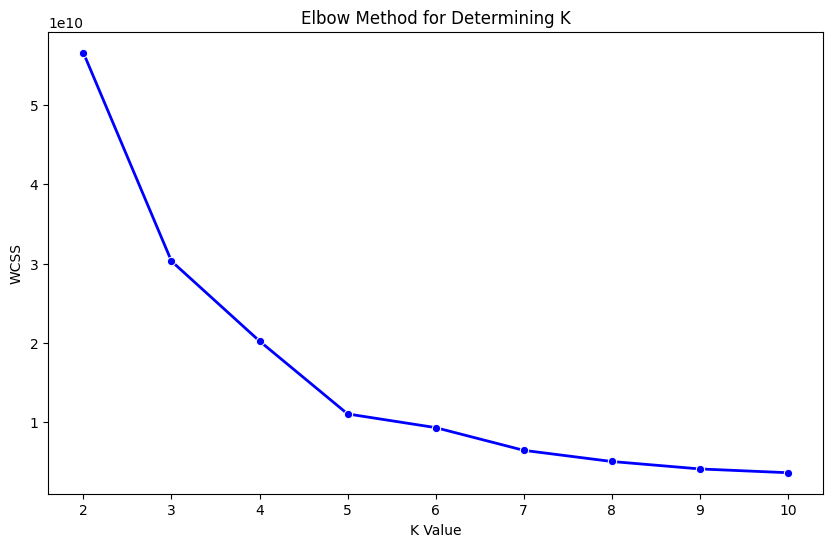

In [57]:
# Elbow Method
inertia_scores = []
K_range = range(2, 11)  # Check for k values from 2 to 10

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=1234)  # Initialize KMeans with current k
    kmeans.fit(df1)  # Fit the model to your data (df1)
    inertia_scores.append(kmeans.inertia_)  # Append the inertia to the list

# Create a DataFrame for plotting
elbow_data = pd.DataFrame({'K Value': K_range, 'WCSS': inertia_scores})

# Visualize the Elbow method
fig, ax = plt.subplots(figsize=(10, 6))
sns.lineplot(data=elbow_data, x='K Value', y='WCSS', linewidth=2, color='blue', marker='o', ax=ax)

ax.set(title="Elbow Method for Determining K", xlabel="K Value", ylabel="WCSS", xticks=K_range)

plt.show()

In [58]:
cluster_balance_description = df1.groupby('cluster')['balance'].describe()
print(cluster_balance_description)

          count         mean          std     min    25%    50%      75%  \
cluster                                                                    
0        6351.0  1599.927570  3380.652168 -6847.0  122.0  580.0  1812.50   
1        3518.0  1457.255259  2940.061288 -1139.0  145.0  539.5  1583.75   
2        1293.0  1371.835267  3178.803624 -2282.0   49.0  439.0  1612.00   

             max  
cluster           
0        81204.0  
1        56831.0  
2        52587.0  


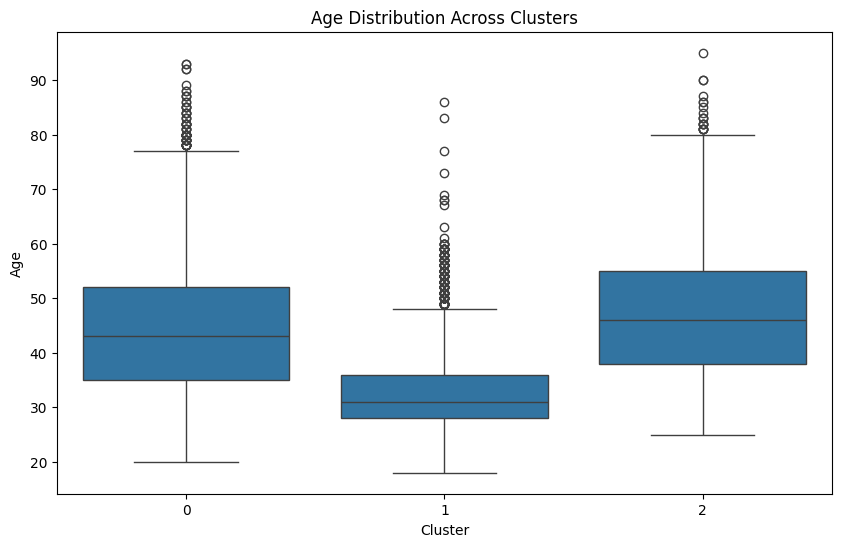

In [60]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='cluster', y='age', data=df1)
plt.title('Age Distribution Across Clusters')
plt.xlabel('Cluster')
plt.ylabel('Age')
plt.show()

In [61]:
def remove_outliers_iqr(data, column):
  """Removes outliers from a DataFrame column using the IQR method.

  Args:
    data: The pandas DataFrame.
    column: The name of the column to remove outliers from.

  Returns:
    A new DataFrame with outliers removed.
  """
  Q1 = data[column].quantile(0.25)
  Q3 = data[column].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  data_no_outliers = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
  return data_no_outliers

# Remove outliers from the 'age' column in df1
df1_no_outliers = remove_outliers_iqr(df1, 'age')

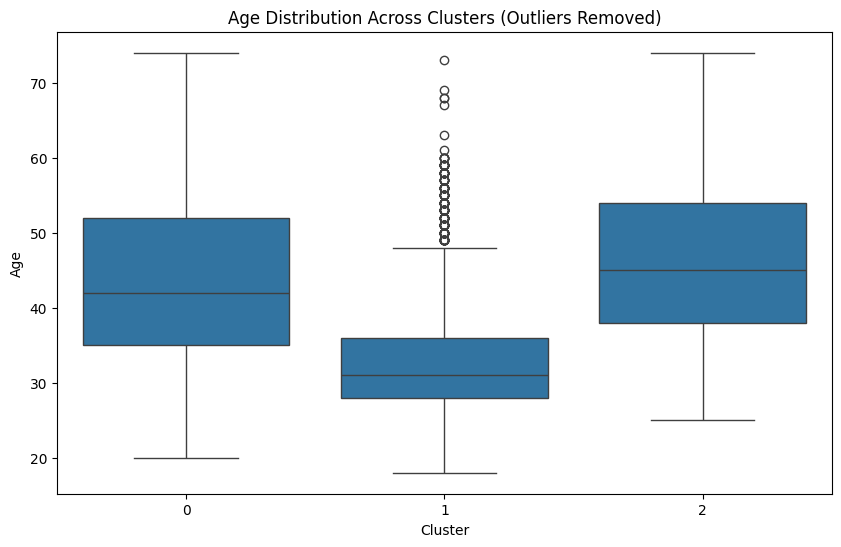

In [62]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='cluster', y='age', data=df1_no_outliers)
plt.title('Age Distribution Across Clusters (Outliers Removed)')
plt.xlabel('Cluster')
plt.ylabel('Age')
plt.show()

Outcomes and recommendations for buisness:

Cluster 0: Married customers-
Wider age distribution - Higher funds reflecting potential joint incomes. Recomendations for marketing include targeting familys and retirement funds.

Cluster 1: Single customers - tends to be lower aged. Balances seem increase with age until middle age where it then decreases

Cluster 2: Divorced customers - Lower funds and typically ranging at a higher age. Balances seem to be higher around the middle age mark which could indicate possibly saving for a new property seperate from the marrital home